# Ejercicio 1

1. **¿Qué son los stocks (reservas) y los flujos en la dinámica de sistemas?**

En dinámica de sistemas, los stocks (o reservas) son las cantidades acumuladas que se mantienen en el tiempo. Representan el estado del sistema en un momento dado. Los flujos, por otro lado, son los procesos que añaden o quitan cantidad a esas reservas. Los flujos determinan cómo cambian los stocks con el tiempo.

**Ejemplo (modelado de pandemias):**
Durante la pandemia de COVID-19, un ejemplo de stock sería la cantidad de "Personas Infectadas". Los flujos serían las "Nuevas Infecciones" (que incrementan el stock) y las "Recuperaciones" o "Muertes" (que lo disminuyen).

2. **Diferencia entre ciclos de retroalimentación de equilibrio (negativos) y de refuerzo (positivos)**
   Los bucles de retroalimentación de equilibrio (negativos) tienden a estabilizar el sistema, contrarrestando los cambios. En cambio, los bucles de retroalimentación de refuerzo (positivos) amplifican los cambios, haciendo que el sistema crezca o decrezca de forma acelerada.

- **Ejemplo de retroalimentación positiva (refuerzo)**:
  Durante la COVID-19, un aumento en el número de infectados lleva a más contactos con personas sanas, lo que genera más contagios. Esto a su vez incrementa aún más el número de infectados. Es un ciclo de crecimiento exponencial.

- **Ejemplo de retroalimentación negativa (equilibrio):**
  Si el número de casos sube, los gobiernos imponen restricciones (confinamientos, uso de mascarillas), lo que reduce los contagios. Esto es un mecanismo de corrección que busca estabilizar la situación.

3. **¿Por qué las ecuaciones diferenciales son fundamentales en dinámica de sistemas?**

Las ecuaciones diferenciales permiten modelar cómo cambian las variables de un sistema a lo largo del tiempo, basándose en sus tasas de cambio. Son fundamentales porque reflejan el comportamiento dinámico de los stocks y flujos, lo que es clave en sistemas complejos.

Donde las ecuaciones capturan la no linealidad porque pueden incorporar dependencias no lineales entre variables. Por ejemplo, el número de nuevas infecciones puede depender no solo de cuántas personas están infectadas, sino también de cuán densamente poblada está una zona o de si hay medidas de prevención. Esto produce comportamientos no proporcionales, como picos o colapsos súbitos en el sistema.

4. **Dibuje un diagrama de bucle causal para la ocupación de camas hospitalarias durante una pandemia. Etiquete las reservas (p. ej., "Pacientes de UCI"), los flujos (p. ej. "Admisiones") y los bucles de retroalimentación (p. ej., "Hacinamiento → Estancias más prolongadas → Disponibilidad reducida de camas").**

![Respuesta de la cuarta pregunta](Imagen1.jpg)

Las admisiones aumentan la cantidad de pacientes en UCI.

Cuando hay exceso de pacientes en UCI, el hospital se llena, generando hacinamiento.

El hacinamiento hace que los pacientes tarden más tiempo en recuperarse y causan estancias prolongadas.

Si los pacientes se quedan más tiempo, hay menos camas disponibles para nuevos pacientes.

Con menos camas libres, el hospital tiene que limitar las admisiones de nuevos pacientes.

A medida que algunos pacientes son dados de altas, se liberan camas y se reduce la ocupación.

# Ejercicio 2

1. **¿Qué es un agente en el modelo ABM? ¿En qué se diferencia de un "stock" en la dinámica de sistemas?**

Un agente en un modelo basado en agentes (ABM) es una entidad autónoma que toma decisiones y actúa según reglas específicas. Estos agentes pueden representar individuos, organizaciones o cualquier unidad con comportamiento propio. En cambio, en la dinámica de sistemas, un "stock" representa una acumulación o reserva de recursos, como población o capital, y su cambio se modela mediante flujos. Donde la principal diferencia radica en que los agentes tienen comportamientos individuales y pueden interactuar entre sí, mientras que los stocks son variables agregadas que cambian de manera continua y determinista.

2. **Describa cómo se representa la heterogeneidad (p. ej., edad, ingresos) en el ABM en comparación con la dinámica de sistemas.**

En el ABM, la heterogeneidad se incorpora asignando características específicas a cada agente, como edad, ingresos o preferencias. Esto permite simular comportamientos diversos y observar cómo las diferencias individuales afectan al sistema en su conjunto. Por otro lado, en la dinámica de sistemas, se suelen utilizar variables promedio o agregadas, lo que puede ocultar las variaciones individuales y limitar el análisis de comportamientos diferenciados.

3. **¿Por qué el ABM suele ser estocástico? ¿Cómo afecta esto a la interpretación del modelo?**

El ABM es frecuentemente estocástico porque incorpora elementos de aleatoriedad para reflejar la incertidumbre y la variabilidad inherente al comportamiento humano y a las interacciones sociales. Esta aleatoriedad permite explorar una gama más amplia de posibles resultados y entender mejor la dinámica del sistema. Sin embargo, también implica que los resultados pueden variar entre simulaciones, por lo que es importante realizar múltiples ejecuciones y analizar patrones emergentes en lugar de confiar en una única predicción.

4. **Imagine modelar una campaña de vacunación. Compare cómo la dinámica de sistemas (compartimentos agregados) y el análisis de mercado (agentes individuales) representarían la reticencia a la vacunación. ¿Qué enfoque captura mejor las redes sociales?**

Si modelara una campaña de vacunación, la dinámica de sistemas representaría la reticencia mediante tasas de transición entre compartimentos (por ejemplo, de susceptibles a vacunados), basadas en promedios poblacionales. En contraste, el ABM permitiría modelar a cada individuo con sus propias creencias, influencias sociales y decisiones, capturando la complejidad de la reticencia a nivel micro. Dado que las redes sociales influyen significativamente en las decisiones de vacunación, el ABM es más adecuado para capturar estas interacciones y entender cómo la información y las opiniones se propagan entre individuos.


# Ejercicio 3
### Parte 1: Modelo SIR clásico (dinámica de sistemas)

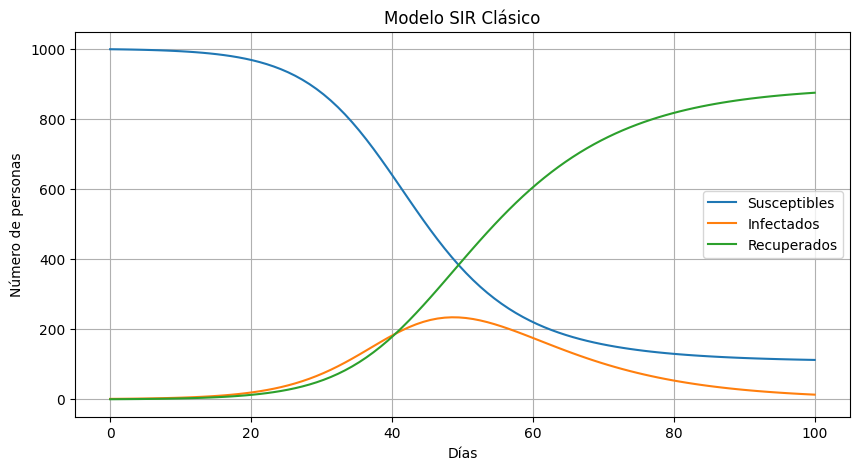

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros iniciales
poblacion_total = 1000
infectados_iniciales = 1
recuperados_iniciales = 0
susceptibles_iniciales = poblacion_total - infectados_iniciales - recuperados_iniciales

# Tasas del modelo
tasa_transmision = 0.25  # beta
tasa_recuperacion = 0.1  # gamma

# Función del sistema de ecuaciones
def ecuaciones_sir(valores, tiempo, beta, gamma):
    s, i, r = valores
    ds = -beta * s * i / poblacion_total
    di = beta * s * i / poblacion_total - gamma * i
    dr = gamma * i
    return [ds, di, dr]

# Rango temporal
dias = np.linspace(0, 100, 100)

# Solución numérica
resultado = odeint(ecuaciones_sir, 
                   [susceptibles_iniciales, infectados_iniciales, recuperados_iniciales], 
                   dias, 
                   args=(tasa_transmision, tasa_recuperacion))

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(dias, resultado[:, 0], label="Susceptibles")
plt.plot(dias, resultado[:, 1], label="Infectados")
plt.plot(dias, resultado[:, 2], label="Recuperados")
plt.title("Modelo SIR Clásico")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.legend()
plt.grid()
plt.show()


### Parte 2: Modelo Basado en Agentes (ABM)

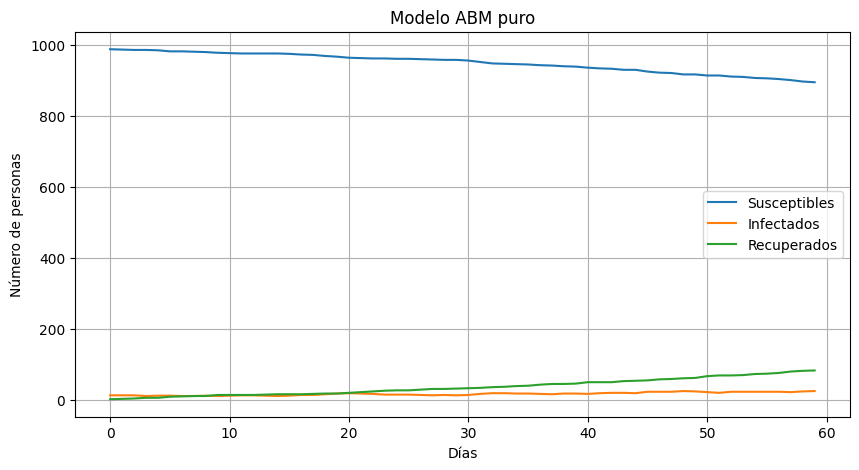

In [5]:
import random

class Individuo:
    def __init__(self, edad, adherencia):
        self.edad = edad
        self.adherencia = adherencia  # entre 0.0 y 1.0
        self.estado = 'S'  # S: susceptible, I: infectado, R: recuperado

def generar_individuos(cantidad):
    return [Individuo(random.randint(0, 80), random.uniform(0.4, 1.0)) for _ in range(cantidad)]

# Lógica del día a día (contactos e infecciones)
def simular_dia(poblacion, prob_base=0.04, interacciones_diarias=8):
    for persona in poblacion:
        if persona.estado == 'I':
            for _ in range(interacciones_diarias):
                objetivo = random.choice(poblacion)
                if objetivo.estado == 'S':
                    chance = prob_base * (1 - objetivo.adherencia)
                    if random.random() < chance:
                        objetivo.estado = 'I'
    
    # Recuperaciones estocásticas
    for persona in poblacion:
        if persona.estado == 'I' and random.random() < 0.08:
            persona.estado = 'R'


# Simulación
dias_abm = 60
registro_abm = []

poblacion_abm = generar_individuos(1000)
for i in range(10):
    poblacion_abm[i].estado = 'I'

for dia in range(dias_abm):
    simular_dia(poblacion_abm)
    
    s = sum(1 for x in poblacion_abm if x.estado == 'S')
    i = sum(1 for x in poblacion_abm if x.estado == 'I')
    r = sum(1 for x in poblacion_abm if x.estado == 'R')
    
    registro_abm.append([s, i, r])

# Graficar resultados
registro_abm = np.array(registro_abm)
plt.figure(figsize=(10,5))
plt.plot(registro_abm[:, 0], label='Susceptibles')
plt.plot(registro_abm[:, 1], label='Infectados')
plt.plot(registro_abm[:, 2], label='Recuperados')
plt.title("Modelo ABM puro")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.legend()
plt.grid()
plt.show()

### Parte 3: Modelo Híbrido (ABM + SIR)

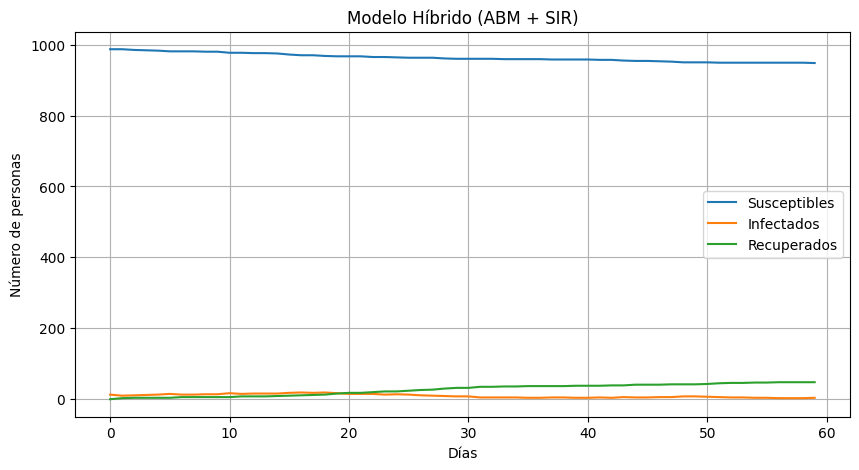

In [3]:
poblacion_simulada = generar_individuos(1000)

# Inicializar algunos infectados
for i in range(12):
    poblacion_simulada[i].estado = 'I'

registros = []

# Simulación por día
for dia in range(60):
    simular_dia(poblacion_simulada)

    total_s = sum(1 for x in poblacion_simulada if x.estado == 'S')
    total_i = sum(1 for x in poblacion_simulada if x.estado == 'I')
    total_r = sum(1 for x in poblacion_simulada if x.estado == 'R')

    # Cálculo dinámico de beta en función del comportamiento
    cumplimiento_medio = np.mean([x.adherencia for x in poblacion_simulada])
    beta_dinamico = 0.25 * (1 - cumplimiento_medio)

    registros.append([total_s, total_i, total_r])

# Visualización del modelo híbrido
datos = np.array(registros)
plt.figure(figsize=(10,5))
plt.plot(datos[:, 0], label="Susceptibles")
plt.plot(datos[:, 1], label="Infectados")
plt.plot(datos[:, 2], label="Recuperados")
plt.title("Modelo Híbrido (ABM + SIR)")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.legend()
plt.grid()
plt.show()


### Vacunación

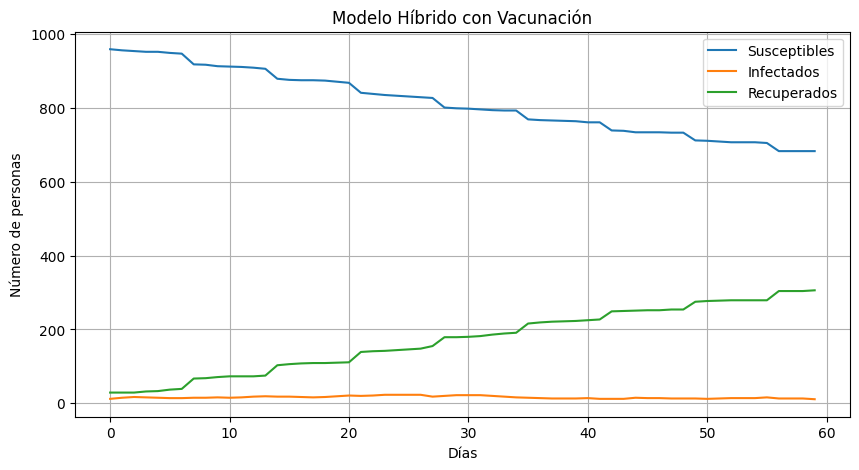

In [9]:
def aplicar_vacunas(poblacion, porcentaje_vacunado=0.02):
    susceptibles = [p for p in poblacion if p.estado == 'S']
    a_vacunar = random.sample(susceptibles, min(int(len(susceptibles) * porcentaje_vacunado), len(susceptibles)))
    for persona in a_vacunar:
        persona.estado = 'R'

# Reiniciar registros y población
registros = []
poblacion_simulada = generar_individuos(1000)

# Inicializar infectados
for i in range(12):
    poblacion_simulada[i].estado = 'I'

# Simulación con vacunación activa cada 7 días
for dia in range(60):
    simular_dia(poblacion_simulada)

    if dia % 7 == 0:
        aplicar_vacunas(poblacion_simulada, porcentaje_vacunado=0.03)

    s = sum(1 for x in poblacion_simulada if x.estado == 'S')
    i = sum(1 for x in poblacion_simulada if x.estado == 'I')
    r = sum(1 for x in poblacion_simulada if x.estado == 'R')

    cumplimiento_medio = np.mean([x.adherencia for x in poblacion_simulada])
    beta_dinamico = 0.25 * (1 - cumplimiento_medio)

    registros.append([s, i, r])

# Graficar resultados de la simulación con vacunación
datos = np.array(registros)
plt.figure(figsize=(10,5))
plt.plot(datos[:, 0], label="Susceptibles")
plt.plot(datos[:, 1], label="Infectados")
plt.plot(datos[:, 2], label="Recuperados")
plt.title("Modelo Híbrido con Vacunación")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.legend()
plt.grid()
plt.show()


## Discusión: ¿Qué enfoque captura mejor la complejidad del mundo real?

| Modelo                        | Ventajas                                                                 | Limitaciones                                                           | Observaciones del gráfico                                      |
|------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------|----------------------------------------------------------------|
| **SIR clásico**              | - Simple de implementar<br>- Describe tendencias globales                | - Población homogénea<br>- Sin comportamiento humano o redes sociales | Curvas suaves y simétricas. No refleja heterogeneidad.         |
| **ABM puro**                 | - Modela individuos con edad y cumplimiento<br>- Estocástico y flexible  | - No hay retroalimentación global<br>- Alta dependencia aleatoria      | Propagación lenta y dispersa. Captura la variabilidad.         |
| **Híbrido (ABM + SIR)**      | - Integra comportamiento y agregados<br>- β dinámico<br>- Permite intervención | - Mayor complejidad de implementación                                 | Curvas más realistas. Reacciona a cambios de comportamiento.   |
| **Híbrido con vacunación**   | - Simula intervención realista<br>- Reduce infectados sin infección directa | - Supone acceso/control sobre el plan de vacunación                   | Recuperados aumentan incluso sin pasar por infección.          |

### Conclusión

El **modelo híbrido** es el que **mejor captura la complejidad del mundo real**, ya que combina:
- Heterogeneidad individual (edad, cumplimiento).
- Retroalimentación dinámica mediante β ajustable.
- Simulación de políticas como vacunación o mascarillas.


## Referencias

Modelado basado en agentes  exploracion de sistemas complejos con simulacion de modelos basados  en agentes - FasterCapital. (s. f.). FasterCapital. https://fastercapital.com/es/contenido/Modelado-basado-en-agentes--exploracion-de-sistemas-complejos-con-simulacion-de-modelos-basados---en-agentes.html
